## BackGround

Fast R-CNN : ROI Pooling을 사용하여 Bbox Regression과 Classification 수행

Faster R-CNN : 각 Feature map을 가지고 RPN(Region Proposal Network)를 수행하고 나온 추출 데이터와 각 Feature map을 ROI Pooling에 넣어서 Bbox Regression과 Classification을 수행한다.



### Instance Segmentation

<img src = 'https://i2.wp.com/robocademy.com/wp-content/uploads/2020/04/instance_seg.png?resize=600%2C450&ssl=1'>


Object Detection = 여러 물체에 대해 어떤 물체인지 분류하는 Classification 문제와 Bounding box 위치 정보를 나타내는 Localization 문제를 둘다 해결해야 하는 분야

Segmentation (분할) = 모든 픽셀의 레이블을 예측하는 방법

여기서 Segmentation은 두가지로 분류가 됩니다.

1. Semantic segmantation
2. instance segmantation

밑의 사진에서 보시면 두 개의 차이점이 분명하게 드러납니다.

오른쪽 semantic segmentation은 어떤 class로 분류해야 하는가에만 초점이 맞춰져 있습니다.

왼쪽의 instance segmentation은 어떤 class인지 분류를 하고 그 다음에 instance도 같이 분류합니다.

<img src = 'https://miro.medium.com/max/700/1*jHv5C23SLtL3UFeR8VnohQ.png'>

왼쪽 : instance segmentation, 오른쪽 : semanticc segmentation


### Mask R-CNN

Mask R-CNN은 instance segmentation 으로 분류하기 위한 모델로 Faster R-CNN 에서 나오는 RPN(Region Proposal Network)와 ROI align과 mask를 사용하여 모델을 예측하는 방식입니다.

COCO 2016 챌린지 우승작에는 전부 Mask R-CNN 계열을 사용할 정도로 성능이 좋다는 것을 알 수 있습니다.


### Faster RCNN

Faster RCNN 에서는 추출된 feature map을 RPN 방법을 사용한 부분과 나온 feature map을 ROI Pooling을 사용하여 class와 bounding box regression을 사용합니다.

<img src = 'https://miro.medium.com/max/2000/1*SkQF8jcGgFO9nVOiprhUEw.jpeg'>

### Mask RCNN

논문에서 주장하는 Mask RCNN은 FPN방법을 사용하여 feature map을 추출하고 RPN 방식을 사용하여 ROI를 구하고 ROI align방법을 사용하여 feature map에 추가시킨 이후 mask, box class, bbox regression을 구하게 됩니다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc0pdEg%2FbtqBL8vzmxg%2F1zkQAmbSKShCvdqXx8jXkk%2Fimg.png'>

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcx1zeb%2FbtqWX5EbBpp%2FSDi2o1RDnpCCs2ckVpA8d0%2Fimg.png'>

### ROI align

기존의 Faster RCNN에서 사용하는 ROI Pooling에서는 RPN을 사용하면 각 pixel에 제대로 적용이 안되는 부분을 보완하고자 Mask RCNN에서 도입하는 방식입니다.

Faster RCNN은 bounding box만을 검출하기 때문에 ROI Pooling을 사용해도 무방했으나 Mask RCNN은 Instance segmentation을 진행하기 때문에 pixel의 정확한 구분이 필요했고 ROI에서 나오는 소숫점을 처리하기 어려웠습니다.

이 부분을 bilinear interpolation을 사용하여 소숫점을 정수화 시킨 이후에 maxpooling을 사용했고 논문에서는 성능이 향상되었다고 얘기하고 있습니다.

<img src = 'https://mblogthumb-phinf.pstatic.net/MjAxNzA1MjRfNzUg/MDAxNDk1NTg2NjQ5NjQ2.XCBp1otbf-_baAXyvsThf_qhjU2oltZVkYAlPQd2bl8g.eE0qGNkhynB87CshsSSw-TezoMZzhZQe0bmsjMG-PGQg.JPEG.sogangori/roiAlign.jpeg?type=w2'>

설명 : https://darkpgmr.tistory.com/117

<img src = 'https://i1.wp.com/thebinarynotes.com/wp-content/uploads/2020/05/RoI-Align-1.png?w=321&ssl=1'>

channel이 80이 되는 이유는 COCO 데이터 셋의 target이 80개가 있기 때문입니다.

그러면 왜? target이 80개인거랑 channel이 80개인 거랑 어떠한 연관이 있을까?

<img src = 'http://i.imgur.com/OBXTpkJ.png'>

### Mask branch

Mask branch에서 사용하는 방법은 FCN(Fully Convolution Network) 입니다.

Mask RCNN은 instance segmentation이 가능한 이유는 이 mask network 때문입니다.

80개의 target이 있다면 각 class별로 channel을 만드는 방식입니다

밑의 사진을 보시면 기린과 기린의 배경이 있다고 하면 기린의 사진의 경우 기린이 있는 pixel은 1 배경은 0으로 지정을 하여 하나를 만들어 줍니다.

또한 배경이 있는 pixel은 1 기린이 있는 pixel은 0으로 하나를 만들어 2채널로 그림을 segmentation하는 방식입니다.
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbaIK6t%2FbtqXb2NcBYr%2FR6vyWUUA9esdvRVzPnZimk%2Fimg.jpg'>

## Code Review

In [47]:
# Version --> 버전 적어둘 것 pytorch!!

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import json
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

from keras.preprocessing import image

## 데이터 살펴보기

In [49]:
# PATH = '/content/drive/MyDrive/인공지능 그랜드 챌린지/dataset_4차_트랙3_sample/'

# Data_PATH = glob(PATH + 't3_*.JPG')

In [50]:
# img_list = []

# for i in Data_PATH:

#   img = image.load_img(f'{i}', target_size = (1080,1920))

#   img_list.append(img)

In [51]:
# for i in img_list:
#   plt.imshow(i)
#   plt.show()

In [52]:
# # 이미지 데이터 numpy로 바꿔주기
# for i in range(len(img_list)):
#   img_list[i] = np.array(img_list[i])

## TACO 데이터로 모델 구성해 보기

In [53]:
!pip install wget
import wget
from tqdm import tqdm

!pip3 install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
!git clone https://github.com/pedropro/TACO.git

# 데이터를 저장해놓고 사용해야겠다.
# 너무 오래걸린다...ㅜㅜ
# import requests
# from io import BytesIO
# from PIL import Image
# import json

# # url이 담겨있는 csv를 가져온다.
# df = pd.read_csv('/content/TACO/data/all_image_urls.csv')

# with open('/content/TACO/data/annotations.json', 'r') as f:

#     json_data = json.load(f)

# print(json.dumps(json_data) )

# # img를 저장할 list만들어 주기
# img_list = []

# # 각 url마다 데이터 가져와서 리스트에 넣어주기
# for i in tqdm(df['https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png']):

#   img = wget.download(i, out = '/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/')

#   img_list.append(img)

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-ez8qwmpw
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-ez8qwmpw
Cloning into 'TACO'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 472 (delta 147), reused 123 (delta 71), pack-reused 270
Receiving objects: 100% (472/472), 68.25 MiB | 15.27 MiB/s, done.
Resolving deltas: 100% (298/298), done.
Checking out files: 100% (25/25), done.


In [54]:
# print(df['https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png'][0])
# json_data.keys()

In [55]:
# final_data = pd.DataFrame([], columns = ['image','images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])

# df[['images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories']] = np.NaN
# data_dict = {}
# for i in range(len(df['https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png'])):
#   for j in range(len(json_data['images'])):

#     if df['https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png'][i] == json_data['images'][j]['flickr_url']:

#       df.loc[i,'images'] = json_data['images'][j]
#       # df.loc[i,'annotations'] = json_data['annotations'][j]
#       # df.loc[i,'scene_annotations'] = json_data['scene_annotations'][j]
#       # df.loc[i,'licenses'] = json_data['licenses'][j]
#       # df.loc[i,'categories'] = json_data['categories'][j]
#       # df.loc[i,'scene_categories'] = json_data['scene_categories'][j]

#       data_dict[df['https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png'][i]] = 


#     else:
#       print('error')

In [56]:
# len(json_data['images'])

In [57]:
# from urllib import request

# # dict에 key는 id, value는 이미지 데이터를 넣는다.
# image_dict = {}

# for i in tqdm(range(len(json_data['images']))):

#   url = json_data['images'][i]['flickr_url']

#   res = request.urlopen(url)

#   res = Image.open(res)

#   image_dict[i] = res

In [58]:
# import pickle
# import base64

# json_data['image_data'] = image_dict

# file_path = '/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/json_data.json'

# with open(file_path, 'w') as f:
  
#   json.dump(json_data, f)

In [59]:
# # 데이터 다 잡아오기

# PATH = '/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/'

# img_data = glob(PATH + '*.jpeg')

# image_df = []

# for i in img_data:
#   image = Image.open(i)

#   image_df.append(image)

In [60]:
# # 그래프를 그려서 사진 확인해 보기
# for i in range(10):
#   plt.imshow(image_df[i])
#   plt.show()

In [61]:
# final_data = []
# for i in image_df:
#   final_data.append()

In [62]:
# print(final_data)

## TACO 전처리

In [63]:
import json
import os
import requests

os.chdir('/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data')

# with open('json_data.json') as f:
#   data = json.loads(f)
# with open('json_data.json') as f:
#   data = json.load(f)

In [64]:
# f = open('json_data.json')
# data = json.load(f)
# print(data)

In [65]:
import pandas as pd

with open('/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/TACO/data/annotations.json') as f:
  data = json.load(f)

In [66]:
# TACO Data에서 100개만 다운로드 하기
# from urllib import request
# import cupy as cp
# import time

# image_list = []

# os.chdir('/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/')

# for i in tqdm(range(100)):
#   url = data['images'][i]['flickr_url']

#   res = request.urlopen(url)
#   res = Image.open(res)

#   res.save(f"{i}.jpeg",'JPEG')

## Mask RCNN

In [67]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

1.9.0+cu111
0.10.0+cu111


In [68]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.deviice('cpu')

print(DEVICE)

cuda


In [69]:
import os
import numpy as np
import torch
from PIL import Image
import torchvision

# 현재 경로를 변경한다.
os.chdir('/content/drive/MyDrive/인공지능 그랜드 챌린지/TACO data/')

# .jpeg로 끝나는 데이터를 전부 불러온다.
data_list = glob('*.jpeg')

# 데이터를 저장할 리스트를 만든다.
data = []

# 데이터를 data에 numpy형태로 저장한다.
for i in tqdm(data_list):
  a = Image.open(i)
  a = np.array(a)

  data.append(a)

100%|██████████| 100/100 [00:09<00:00, 10.95it/s]


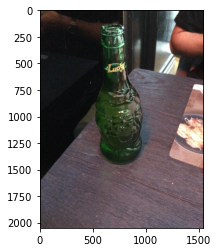

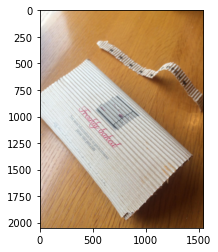

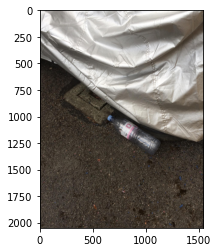

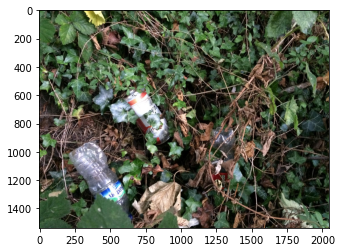

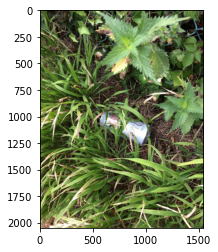

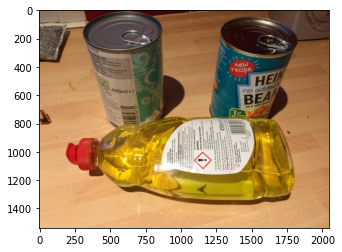

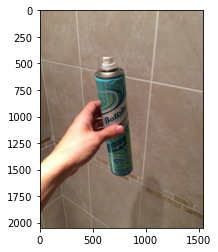

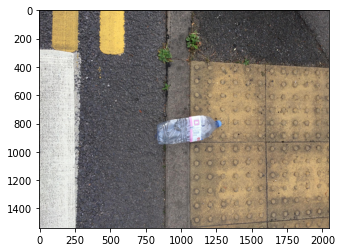

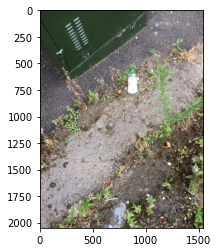

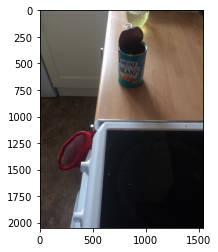

In [70]:
for i in range(10):
  plt.imshow(data[i])
  plt.show()

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import datetime
import os
import random
import re

import numpy
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

import utils
import visualize
from nms.nms_wrapper import nms
from roialign.roi_align.crop_and_resize import CropAndResizeFunction

class ImageProcess(nn.Module):
  def __init__(self, root):
    self.root = root
    self.json = json

  def process(self, idx):

    img_path = 
    mask_path = 

    img = Image.open(img_path).convert('RGB')
    
    
  
class FPN(nn.Module):
  def __init__(self, C1, C2, C3, C4, C5, out_channels):
    super(FPN, self).__init__()

    self.out_channels = out_channels
    self.C1 = C1
    self.C2 = C2
    self.C3 = C3
    self.C4 = C4
    self.C5 = C5

    self.P6 = nn.MaxPool2d(kernel_size = 1, stride = 2)
    self.P5_conv1 = nn.Conv2d(2048, self.out_channels, kernel_size = 1, stride = 1)
    self.P5_conv2 = nn.Sequential(
        SamePad2d(kernel_size = 3, stride = 1),
        nn.Conv2d(self.out_channels, self.out_channels, kernel_size = 3, stride = 1)
    )
    self.P4_conv1 = nn.Conv2d(1024, self.out_channels, kernel_size = 1, stride = 1)
    self.P4_conv2 = nn.Sequential(
        SamePad2d(kernel_size = 3, stride = 1),
        nn.Conv2d(self.out_channels, self.out_channels, kernel_size = 3, stride = 1)
    )

    self.P3_conv1 = nn.Conv2d(512, self.out_channels, kernel_size = 1, stride = 1)
    self.P3_conv2 = nn.Sequential(
      SamePad2d(kernel_size = 3, stride = 1),
      nn.Coonv2d(self.out_channels, self.out_channels, kernel_size = 3, stride = 1)
    )

    self.P2_conv1 = nn.Conv2d(256, self.out_channels, kernel_size = 1, stride = 1)
    self.P2_conv2 = nn.Sequential(
        SamePad2d(kernel_size = 3, stride = 1),
        nn.Conv2d(self.out_channels, self.out_channels, kernel_size = 3, stride = 1)
    )

  def forward(self, x):
    # 왜 이게 함수가 되었을까? 그러면 함수를 계속 넣어주는 방식?
    # 내일 다시 확인
    x = self.C1(x)
    x = self.C2(x)
    c2_out = x


SyntaxError: ignored